I/O

In [475]:
import cv2
import numpy as np
from numpy import unravel_index
from matplotlib import pyplot as plt
import math

sample1 = cv2.imread('hw2_sample_images/sample1.png',0)
sample2 = cv2.imread('hw2_sample_images/sample2.png',0)
sample3 = cv2.imread('hw2_sample_images/sample3.png',0)

sample5 = cv2.imread('hw2_sample_images/sample5.png',0)

Some functions

In [476]:
def gradient_magntitue_and_orientation(img,kernel_size,row_grad_mask,col_grad_mask):
    height,width = img.shape
    pad_size = kernel_size//2
    pad_img = cv2.copyMakeBorder(img,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
    G= np.zeros(pad_img.shape)
    O= np.zeros(pad_img.shape)
    for i in range(pad_size,pad_size+height):
        for j in range(pad_size,pad_size+width):
             window = pad_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
             g_r = (row_grad_mask*window).sum()
             g_c = (col_grad_mask*window).sum()
             g = math.hypot(g_r,g_c)
             o = math.degrees(math.atan2(g_c,g_r))
             G[i,j]=g
             O[i,j]=o
    return G[pad_size:pad_size+height,pad_size:pad_size+width],O[pad_size:pad_size+height,pad_size:pad_size+width]

def convolution(img,kernel_size,kernel):
    height,width = img.shape
    pad_size = kernel_size//2
    pad_img = cv2.copyMakeBorder(img,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
    G= np.zeros(pad_img.shape)
    for i in range(pad_size,pad_size+height):
        for j in range(pad_size,pad_size+width):
             window = pad_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
             G[i,j]=(window*kernel).sum()
    return G[pad_size:pad_size+height,pad_size:pad_size+width]

def plot_histogram(img,fig_name):
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    plt.bar(bins[:-1],hist)
    plt.title(f"{fig_name}_histogram")
    plt.show()
    plt.clf()

Sobel Edge detection:
Apply Sobel edge detection to sample1.png. Output the gradient image and its corresponding edge
map as result1.png and result2.png, respectively. Please also describe how you select the threshold and how
it affects the result.

Text(0.5, 1.0, 'gradient result')

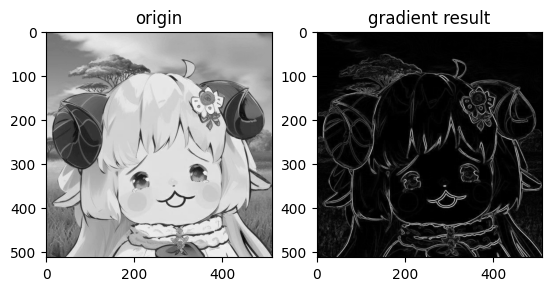

In [477]:
def sobel_gradient(img):
    K=2
    kernel_size=3
    row_grad_mask =np.array([[-1,0,1],[-K,0,K],[-1,0,1]])/(K+2)
    col_grad_mask =np.array([[1,K,1],[0,0,0],[-1,-K,-1]])/(K+2)
    return gradient_magntitue_and_orientation(img,kernel_size,row_grad_mask,col_grad_mask)

# def SED_gradient(img):
#     height,width = img.shape
#     K=2
#     kernel_size=3
#     pad_size = kernel_size//2
#     row_grad_mask =np.array([[-1,0,1],[-K,0,K],[-1,0,1]])/(K+2)
#     col_grad_mask =np.array([[1,K,1],[0,0,0],[-1,-K,-1]])/(K+2)
#     pad_img = cv2.copyMakeBorder(img,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
#     G= np.zeros(pad_img.shape)
#     for i in range(pad_size,pad_size+height):
#         for j in range(pad_size,pad_size+width):
#              window = pad_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
#              g_r = (row_grad_mask*window).sum()
#              g_c = (col_grad_mask*window).sum()
#              g = math.sqrt(math.pow(g_r,2)+math.pow(g_c,2))
#              G[i,j]=g
#     return G[pad_size:pad_size+height,pad_size:pad_size+width]

result1,result1_O= sobel_gradient(sample1)
cv2.imwrite("result1.png",result1)

plt.subplot(121)
plt.imshow(sample1, cmap='gray')
plt.title('origin')

plt.subplot(122)
plt.imshow(result1, cmap='gray')
plt.title('gradient result')

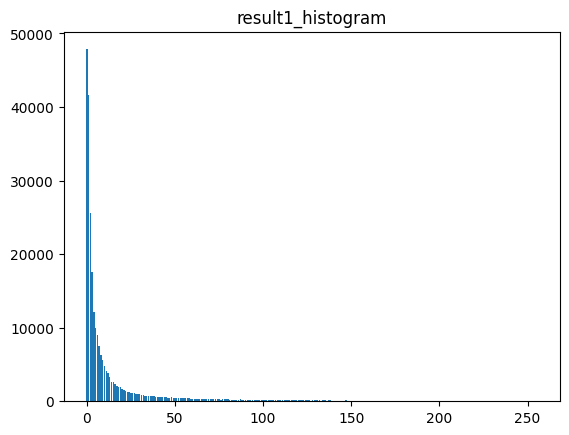

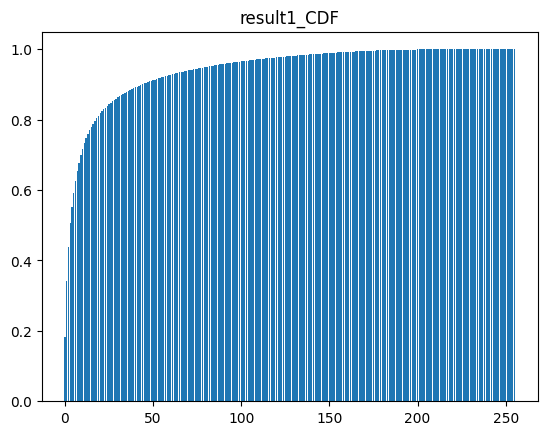

threshold at:43


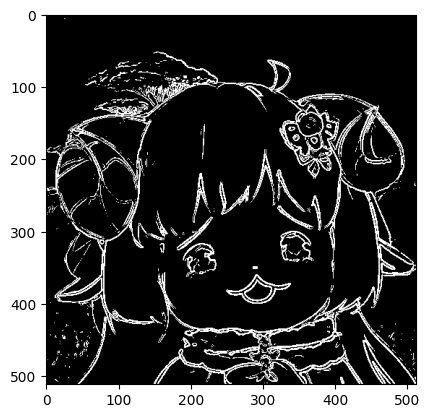

In [478]:
# reference: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html#:~:text=You%20can%20consider%20histogram%20as,way%20of%20understanding%20the%20image.
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
def find_percentage_at(img,fig_name,percentage):
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    # 計算指定的百分比位於哪個intensity
    pdf = hist/img.size
    cdf = pdf.cumsum()
    # plot cdf histogram
    plt.bar(bins[:-1],cdf)
    plt.title(f"{fig_name}_CDF")
    plt.show()
    plt.clf()
    for intensity in range(0,256):
        if cdf[intensity]>percentage:
            return intensity-1
    
def SED_threshold(G,threshold):
    res = np.zeros(G.shape)
    res[G>=threshold] = 255
    return res

plot_histogram(result1,'result1')

threshold = find_percentage_at(result1,'result1',0.9)
print(f"threshold at:{threshold}")
result2 = SED_threshold(result1,threshold)
cv2.imwrite("result2.png",result2)
plt.imshow(result2, cmap='gray')
# TODO:也許先做降噪

Canny edge: Perform Canny edge detection on sample1.png and output the edge map as result3.png. Please also
describe how you select the parameters and how they affect the result.

Noise reduction

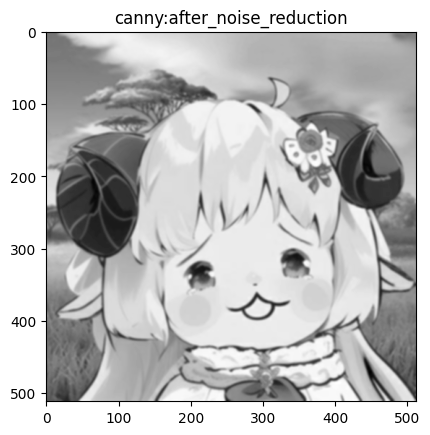

In [479]:
def gaussian_noise_reduction(img):
    gaussian_filter= np.array([[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]]) / 159
    return convolution(img,5,gaussian_filter)

after_noise_reduction = gaussian_noise_reduction(sample1)
plt.title('canny:after_noise_reduction')
plt.imshow(after_noise_reduction, cmap='gray')

Compute gradient magnitude and orientation

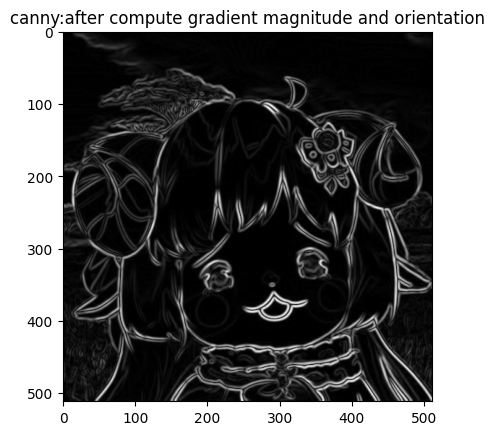

In [480]:
C_G,C_O= sobel_gradient(after_noise_reduction)
plt.title('canny:after compute gradient magnitude and orientation')
plt.imshow(C_G, cmap='gray')

Non-maximal suppression

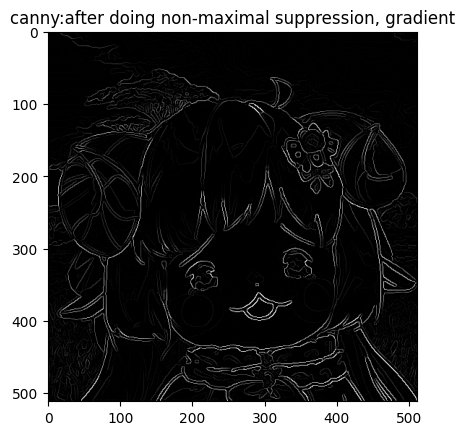

In [481]:
def non_maximal_suppression(C_G,C_O):
    height,width = C_G.shape
    pad_size = 1
    pad_G = cv2.copyMakeBorder(C_G,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
    pad_O = cv2.copyMakeBorder(C_O,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
    thin_edge_G = np.zeros(pad_G.shape)
    for i in range(pad_size,pad_size+height):
        for j in range(pad_size,pad_size+width):
            if -22.5<pad_O[i][j]<=22.5 or pad_O[i][j]<=-157.5 or pad_O[i][j]>157.5:
                if pad_G[i][j]>pad_G[i][j-1] and pad_G[i][j]>pad_G[i][j+1]:
                    thin_edge_G[i][j]=pad_G[i][j]
            elif  22.5 < pad_O[i][j]<=67.5 or -157.5<pad_O[i][j]<=-112.5:
                if pad_G[i][j]>pad_G[i+1][j-1] and pad_G[i][j]>pad_G[i-1][j+1]:
                    thin_edge_G[i][j]=pad_G[i][j]
            elif 67.5<pad_O[i][j]<=112.5 or -112.5<pad_O[i][j]<=-67.5:
                if pad_G[i][j]>pad_G[i-1][j] and pad_G[i][j]>pad_G[i+1][j]:
                    thin_edge_G[i][j]=pad_G[i][j]
            else:
                if pad_G[i][j]>pad_G[i-1][j-1] and pad_G[i][j]>pad_G[i+1][j+1]:
                    thin_edge_G[i][j]=pad_G[i][j]
    return thin_edge_G[pad_size:pad_size+height,pad_size:pad_size+width]

thin_edge_G = non_maximal_suppression(C_G,C_O)
plt.title('canny:after doing non-maximal suppression, gradient')
plt.imshow(thin_edge_G, cmap='gray')


Hysteretic thresholding

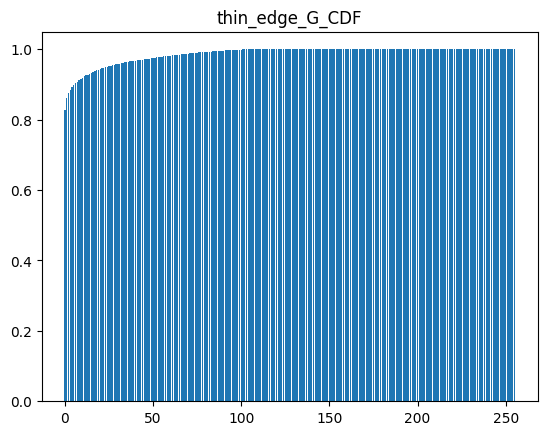

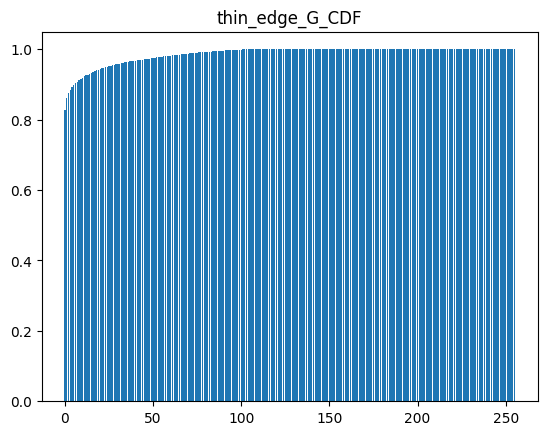

high threshold:23
low threshold:2


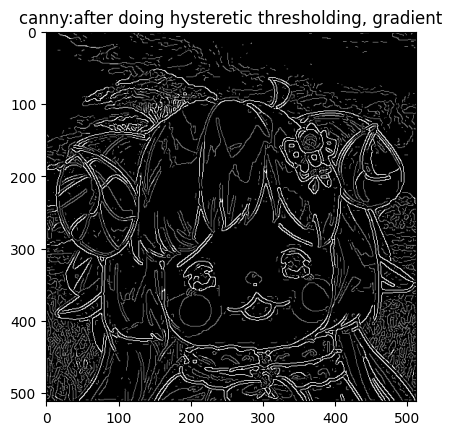

In [482]:
def hysteretic_thresholding(G,percentage_of_high_bound,percentage_of_low_bound):
    height,width = G.shape
    T_H=find_percentage_at(thin_edge_G,'thin_edge_G',percentage_of_high_bound)
    T_L=find_percentage_at(thin_edge_G,'thin_edge_G',percentage_of_low_bound)
    print(f"high threshold:{T_H}")
    print(f"low threshold:{T_L}")
    label = np.zeros(G.shape)
    res = np.zeros(G.shape)
    for i in range(0,height):
        for j in range(0,width):
            if G[i][j]>=T_L:
                if G[i][j]>=T_H:
                    label[i][j]=2
                    res[i][j]=255
                else:
                    label[i][j]=1
                    res[i][j]=128
    return res,label
H_threshold,H_threshold_label=hysteretic_thresholding(thin_edge_G,0.95,0.88)
plt.title('canny:after doing hysteretic thresholding, gradient')
plt.imshow(H_threshold, cmap='gray')


Connected component labeling method

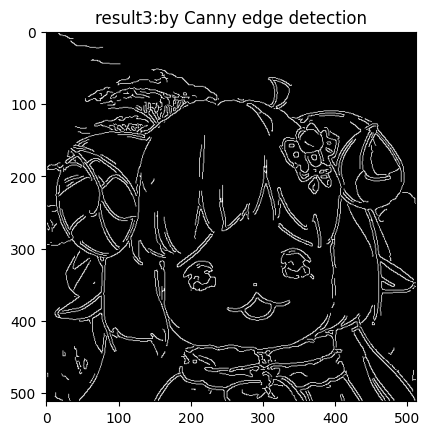

In [483]:
# by eight-neighbor connectivity
def connected_component_labeling(img):
    height,width = img.shape
    res = img.copy()
    for i in range(0,height-1):
        for j in range(0,width-1):
            if res[i][j] >=2:
                if res[i][j+1]>0:
                    res[i][j+1]=2
                if res[i+1][j]>0:
                    res[i+1][j]=2
                if res[i+1][j+1]>0:
                    res[i+1][j+1]=2
    for i in reversed(range(1,height)):
        for j in reversed(range(1,width)):
            if res[i][j] >=2:
                if res[i][j-1]>0:
                    res[i][j-1]=2
                if res[i-1][j]>0:
                    res[i-1][j]=2
                if res[i-1][j-1]>0:
                    res[i-1][j-1]=2
    for i in range(0,height):
        for j in range(0,width):
            if res[i][j] ==2:
                res[i][j]=255
            else:
                res[i][j]=0
    return res

result3 = connected_component_labeling(H_threshold_label)
cv2.imwrite("result3.png",result3)
plt.title('result3:by Canny edge detection')
plt.imshow(result3, cmap='gray')

Laplacian of Gaussian edge detection:Use the Laplacian of Gaussian edge detection to generate the edge map of sample1.png and output it as result4.png. Compare result2.png result3.png and result4.png and discuss on these three results.

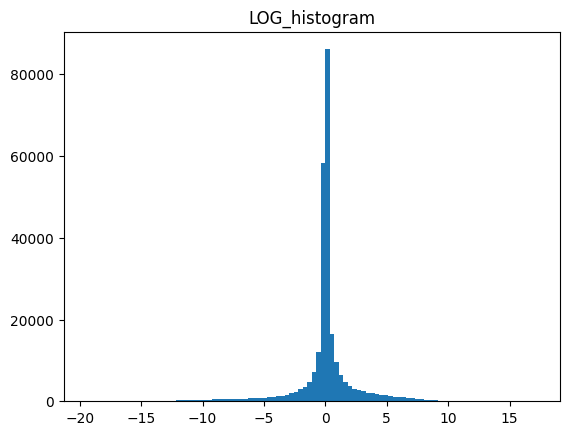

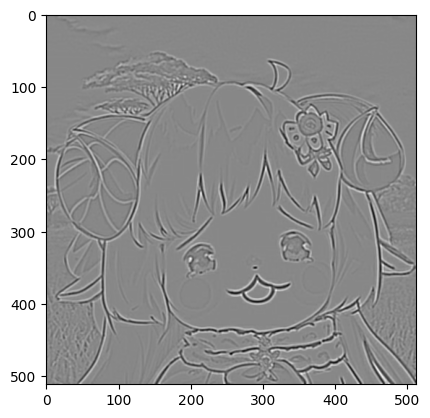

In [484]:
def LOG(img):
    res = gaussian_noise_reduction(img)
    laplacian_impulse_response = np.array([[-2,1,-2],[1,4,1],[-2,1,-2]])/8
    res = convolution(res,3,laplacian_impulse_response)
    return res

log_G=LOG(sample1)
hist,bins = np.histogram(log_G.ravel(),bins=100,range=(log_G.min(),log_G.max()))
plt.hist(bins[:-1],bins,weights=hist)
plt.title("LOG_histogram")
plt.show()
plt.clf()

plt.imshow(log_G,cmap='gray')

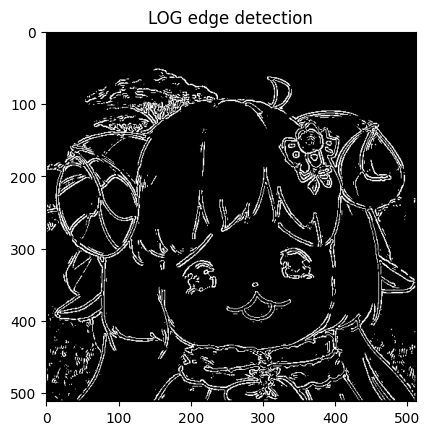

In [485]:
def seperate_0(G_2OD,threshold):
    height,width = G_2OD.shape
    zero_crossing_candidate=np.zeros((height,width))
    zero_crossing_candidate[abs(G_2OD)<=threshold]=1
    return zero_crossing_candidate

def zero_crossing_setection(zero_map,log_G):
    height,width=log_G.shape
    res=np.zeros((height,width))
    for i in range(1,height-1):
        for j in range(1,width-1):
            if zero_map[i][j]==1:
                if log_G[i-1][j-1]*log_G[i+1][j+1]<-4 or log_G[i][j-1]*log_G[i][j+1]<-4 or log_G[i+1][j-1]*log_G[i-1][j+1]<-4 or log_G[i-1][j]*log_G[i+1][j]<-4:
                    res[i][j] = 255
    return res

after_select_0=seperate_0(log_G,5)
# plt.imshow(after_select_0, cmap='gray')
result4=zero_crossing_setection(after_select_0,log_G)

cv2.imwrite('result4.png',result4,)
plt.title("LOG edge detection")
plt.imshow(result4, cmap='gray')

Edge Crispening:Perform edge crispening on sample2.png and output the result as result5.png. What difference can
you observe from sample2.png and result5.png? Please specify the parameters you choose and discuss how
they affect the result.

True

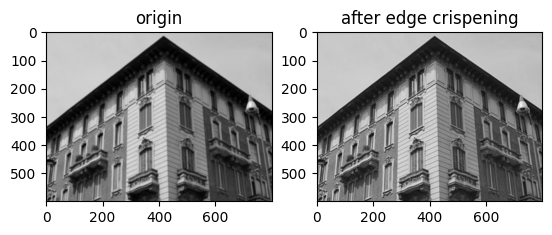

In [502]:
# def edge_crispening(img,kernel_size,kernel,c):
#     after_low_pass=convolution(img,kernel_size,kernel)
#     G=c/(2*c-1)*img-(1-c)/(2*c-1)*after_low_pass
#     return G
def edge_crispening(img,c):
    after_low_pass=gaussian_noise_reduction(img)
    G=c/(2*c-1)*img-(1-c)/(2*c-1)*after_low_pass
    return G

result5 = edge_crispening(sample2,3/5)

# plt.title("edge crispening")
# plt.imshow(result5, cmap='gray')

plt.subplot(121)
plt.imshow(sample2, cmap='gray')
plt.title('origin')

plt.subplot(122)
plt.imshow(result5, cmap='gray')
plt.title('after edge crispening')

cv2.imwrite('result5.png',result5)

(Bonus) Perform Canny edge detection on result5.png and output the edge map as result6.png. Then apply
the Hough transform to result6.png and output the Hough space as result7.png. What lines can you detect
by this method?

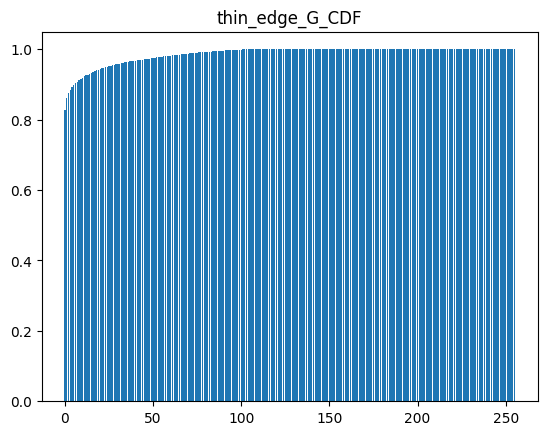

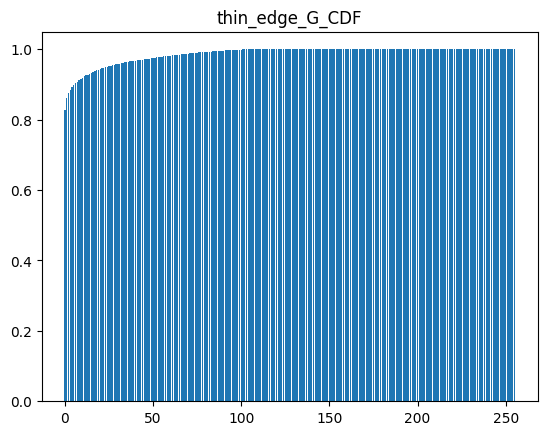

high threshold:10
low threshold:1


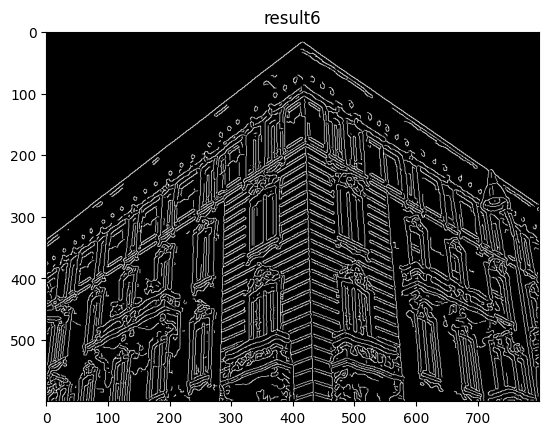

In [503]:
def canny_edge_detection(img,percentage_of_high_bound,percentage_of_low_bound):
    after_noise_reduction = gaussian_noise_reduction(img)
    C_G,C_O= sobel_gradient(after_noise_reduction)
    thin_edge_G = non_maximal_suppression(C_G,C_O)
    H_threshold,H_threshold_label=hysteretic_thresholding(thin_edge_G,percentage_of_high_bound,percentage_of_low_bound)
    result = connected_component_labeling(H_threshold_label)
    return result

result6=canny_edge_detection(result5,0.92,0.87)
cv2.imwrite('result6.png',result6)
plt.title("result6")
plt.imshow(result6, cmap='gray')

The Borzoi wants to help you to get the potato chips. Please design an algorithm to make sample3.png
become sample4.png. Output the result as result8.png with the same dimension as sample3.png. Please
describe your method and implementation details clearly. (hint: you may perform rotation, scaling, translation,
etc.)

In [504]:
# def rotation(img,angle):

# def scale(img,s_x,s_y,central_point):
#     height,width = img.shape
#     scale_matrix=np.array([[s_x,0][s_y,0]])

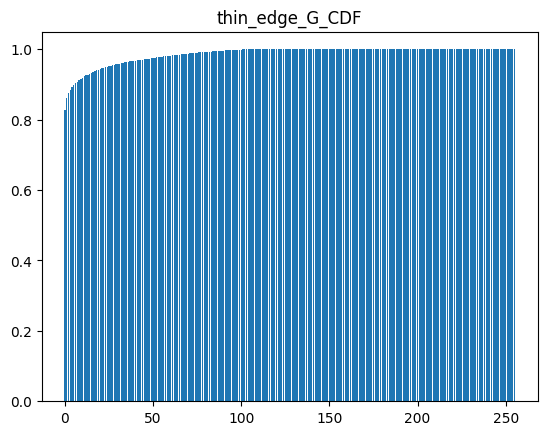

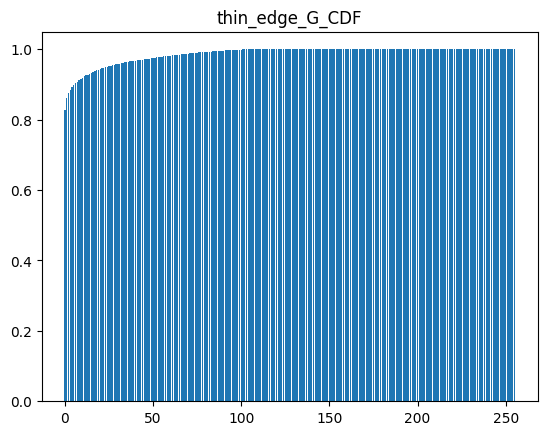

high threshold:5
low threshold:3


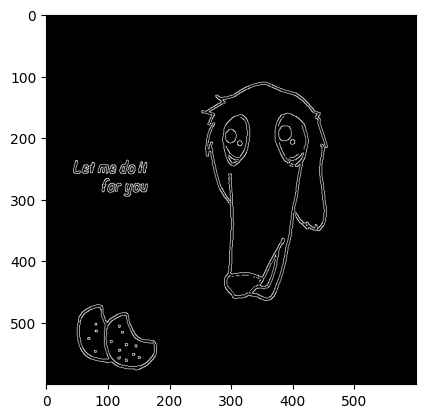

In [505]:
ED=canny_edge_detection(sample3,0.9,0.89)
plt.imshow(ED,cmap='gray')

In [506]:
def find_leftest_component_ep(img):
    height,width = img.shape
    r_found=False
    # 找最右邊的座標和最左邊切在哪個y
    for j in reversed(range(0,width)):
        pixel_all_zero=True
        for i in range(0,height):
            if img[i][j]==255:
                pixel_all_zero=False
                # 找到最右邊的點
                if r_found == False:
                    r=[i,j]
                    r_j=j
                    r_found=True
        if r_found == True and pixel_all_zero==True:
            l_j=j+1
            break
    u_found=False
    for i in range(0,height):
        pixel_all_zero=True
        for j in range(l_j,r_j+1):
            if img[i][j]==255:
                pixel_all_zero=False
                if u_found==False:
                    u=[i,j]
                    u_i=i
                    u_found=True
                if j == l_j:
                    l=[i,j]
        if u_found == True and pixel_all_zero==True:
            d_i=i-1
            break
    for j in range(l_j,r_j+1):
        if img[d_i][j]==255:
            d=[d_i,j]
            break            
    print(f"{u},{d},{l},{r},{u_i},{d_i},{l_j},{r_j}")          

    
find_leftest_component_ep(ED)


[110, 349],[464, 354],[159, 252],[213, 456],110,464,252,456


In [507]:
def find_lowest_component_ep(img):
    height,width = img.shape
    d_found=False
    # 找最下邊的座標和最上邊切在哪個i
    for i in reversed(range(0,height)):
        pixel_all_zero=True
        for j in range(0,width):
            if img[i][j]==255:
                pixel_all_zero=False
                # 找到最下邊的點
                if d_found == False:
                    d=[i,j]
                    d_i=i
                    d_found=True
        if d_found == True and pixel_all_zero==True:
            u_i=i+1
            break
    l_found=False
    for j in range(0,width):
        pixel_all_zero=True
        for i in range(u_i,d_i+1):
            if img[i][j]==255:
                pixel_all_zero=False
                if l_found==False:
                    l=[i,j]
                    l_j=j
                    l_found=True
                if i == u_i:
                    u=[i,j]
        if l_found == True and pixel_all_zero==True:
            r_j=j-1
            break
    for i in range(u_i,d_i+1):
        if img[i][r_j]==255:
            r=[i,r_j]
            break
    print(f"{u},{d},{l},{r},{u_i},{d_i},{l_j},{r_j}")            
    return u,d,l,r,u_i,d_i,l_j,r_j

def find_the_chips_right_side(img):
    height,width=img.shape
    cross=False
    for i in range(0,height):
        pixel_all_zero=True
        for j in range(0,width):
            if img[i][j]==255:
                pixel_all_zero=False
                if cross ==False:
                    cross=True
        if cross == True and pixel_all_zero==True:
            chips_right_side=i-1
            break
    for j in range(0,width):
        if img[chips_right_side][j]==255:
            chips_right_side_j=j
    print(f"chips right side i at: {chips_right_side+1}")
    print(f"chips right side j at: {chips_right_side_j}")
    return [chips_right_side,chips_right_side_j]

[252, 442],[456, 384],[354, 135],[349, 489],252,456,135,489
chips right side i at: 180
chips right side j at: 63


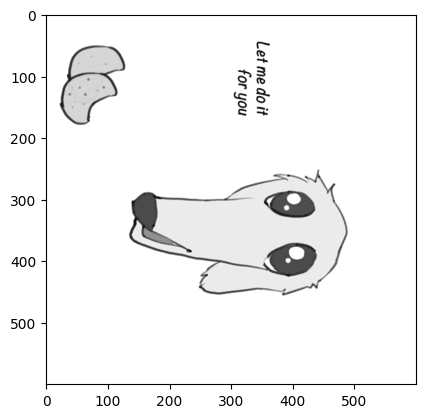

In [508]:
def image_to_cartesian_coordinate(img):
    height,width=img.shape
    cart=np.zeros((height,width))
    for j in range(0,height):
        for k in range(0,width):
            cart[k][height-j-1]=img[j][k]
    return cart

cartesian_coordinate=image_to_cartesian_coordinate(sample3)
plt.imshow(cartesian_coordinate,cmap='gray')

def translation(img,tx,ty):
    height,width = img.shape
    res=np.zeros((height,width))
    for x in range(0,height):
        for y in range(0,width):
            u=x-tx
            v=y-ty
            if u<0 or u>=height or v<0 or v>=width:
                res[x][y]=255
                continue
            res[x][y]=img[u][v]
    return res

def scale(img,sx,sy):
    height,width= img.shape
    res=np.zeros((height,width))
    for x in range(0,width):
        for y in range(0,height):
            u = round(x / sx)
            v = round(y / sy)
            if u<0 or u>=width or v<0 or v >=height:
                res[x][y]=255
                continue
            res[x][y]=img[u][v]
    return res

def rotation(img,angle):
    height,width= img.shape
    res=np.zeros((height,width))
    r_M=np.array([[math.cos(angle/180),math.sin(angle/180)],[-math.sin(angle/180),math.cos(angle/180)]])
    for x in range(0,width):
        for y in range(0,height):
            cart=np.array([[x],[y]])
            cor=np.dot(r_M,cart)
            u=round(cor[0][0])
            v=round(cor[1][0])
            if u<0 or u>=width or v<0 or v >=height:
                res[x][y]=255
                continue
            res[x][y]=img[u][v]
    return res

def cartesian_to_image_coordinate(cart):
    height,width=cart.shape
    img=np.zeros((height,width))
    for j in range(0,height):
        for k in range(0,width):
            img[j][k]=cart[k][height-j-1]
    return img

ED_by_cart=image_to_cartesian_coordinate(ED)
up,down,left,right,u,d,l,r=find_lowest_component_ep(ED_by_cart)
# print(f"{up},{down},{left},{right},{u},{d},{l},{r}")
nose_at=find_the_chips_right_side(ED_by_cart)

sample3_by_cart=image_to_cartesian_coordinate(sample3)

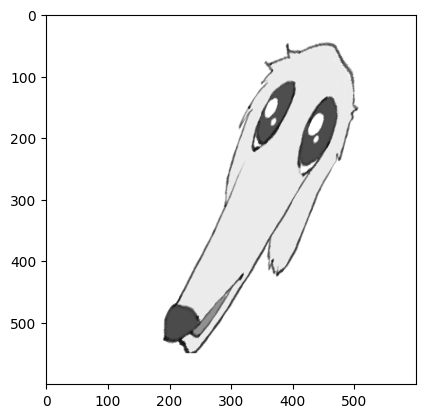

In [509]:
after_t=translation(sample3_by_cart,-252,-135)
# after_t=translation(after_t,0,60)
after_t=translation(after_t,0,25)

scale_x=(r-nose_at[0])/(r-l)
scale_y=(d-nose_at[1])/(d-u)
after_s=scale(after_t,scale_x,scale_y-0.35)
# plt.imshow(after_scale,cmap='gray')

after_r=rotation(after_s,-80)
# plt.imshow(after_r,cmap='gray')

move_back=translation(after_r,130,50)
by_img_cor=cartesian_to_image_coordinate(move_back)
plt.imshow(by_img_cor,cmap='gray')

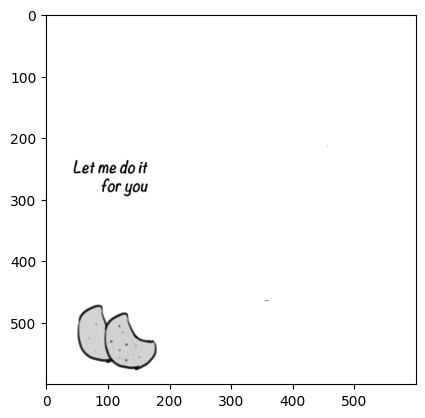

In [510]:
def clear_dog(img):
    height,width=img.shape
    res=img.copy()
    # 110,464,252,456
    for i in range(110,464):
        for j in range(252,456):
            res[i][j]=255
    return res

no_dog=clear_dog(sample3)
plt.imshow(no_dog,cmap='gray')

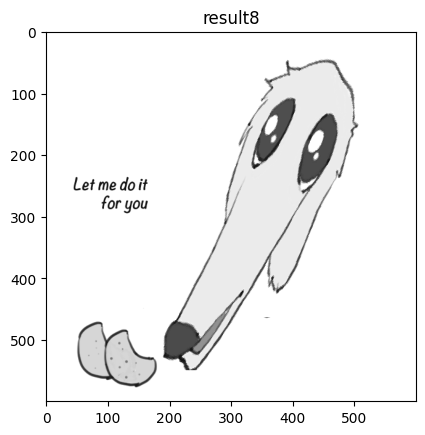

In [511]:
def merge(img1,img2):
    height,width=img1.shape
    res=np.zeros((height,width))
    res=res+255
    for i in range(0,height):
        for j in range(0,width):
            res[i][j]=min(img1[i][j],img2[i][j])

    return res

result8=merge(no_dog,by_img_cor)

cv2.imwrite('result8.png',result8,)
plt.title("result8")
plt.imshow(result8,cmap='gray')